# Shots

What am i trying to predict?
## See whether these factors below affect my shot score such as:
- Which day I train
- The time of the training
- Whether I went to school on that day
- If I was using my own gun


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import seaborn as sns
df = pd.read_csv('/content/sample_data/shot_data (1).csv')

In [ ]:
df.head()

,set,day_of_week,went_to_school,session_time,using_own_gun,MPI_x,MPI_y,target_type,shot,sighted_direction,sighted_times
0,1,Friday,True,afternoon,True,0.65,0.12,paper,9.0,0,0
1,1,Friday,True,afternoon,True,0.65,0.12,electronic,9.5,0,0
2,1,Friday,True,afternoon,True,0.65,0.12,paper,9.0,0,0
3,1,Friday,True,afternoon,True,0.65,0.12,electronic,9.6,L,1
4,1,Friday,True,afternoon,True,0.65,0.12,electronic,9.5,0,0


# Learning more about my dataset

## Checking Data

In [ ]:
df.shape


(1000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   set                1000 non-null   int64  
 1   day_of_week        1000 non-null   object 
 2   went_to_school     600 non-null    object 
 3   session_time       1000 non-null   object 
 4   using_own_gun      1000 non-null   bool   
 5   MPI_x              1000 non-null   float64
 6   MPI_y              1000 non-null   float64
 7   target_type        1000 non-null   object 
 8   shot               1000 non-null   float64
 9   sighted_direction  1000 non-null   object 
 10  sighted_times      1000 non-null   int64  
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 79.2+ KB


In [ ]:
df.describe()

,set,MPI_x,MPI_y,shot,sighted_times
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,5.500000,0.01110,0.064000,9.177200,0.272000
std,2.873719,0.71319,0.749214,1.143428,0.752717
min,1.000000,-1.21000,-1.250000,7.000000,0.000000
25%,3.000000,-0.61250,-0.495000,8.000000,0.000000
50%,5.500000,0.01500,0.115000,9.500000,0.000000
75%,8.000000,0.65750,0.695000,10.000000,0.000000
max,10.000000,1.23000,1.230000,10.900000,4.000000


## EDA

Exploratory Data Analysis for Shot score, MPI (Mean Point of Impact)

# Histogram for Shot score

array([[<Axes: title={'center': 'shot'}>]], dtype=object)

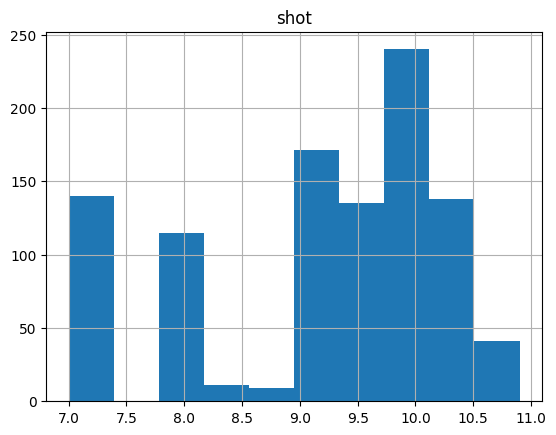

In [ ]:
df.hist(column='shot')

# Box plots for MPI

Why do I use a boxplot for MPI?
- To see range and outliers more clearly

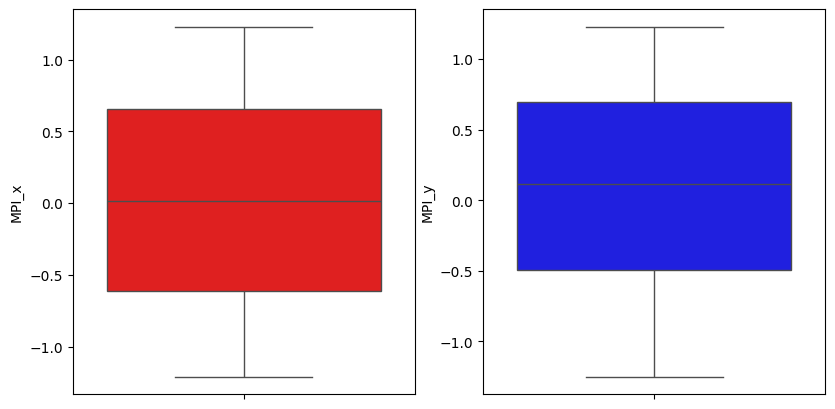

In [ ]:
plt.figure(figsize=(15,5))

features_to_examine = ['MPI_x','MPI_y']
temp = df[features_to_examine]
colors=['','red','blue']
i=1
for col in temp.columns:
    plt.subplot(1,3,i)
    a1 = sns.boxplot(data=temp,y=col,color=colors[i])
    i+=1

# To Check Individual variables if they affect Shot score

<Axes: xlabel='session_time', ylabel='shot'>

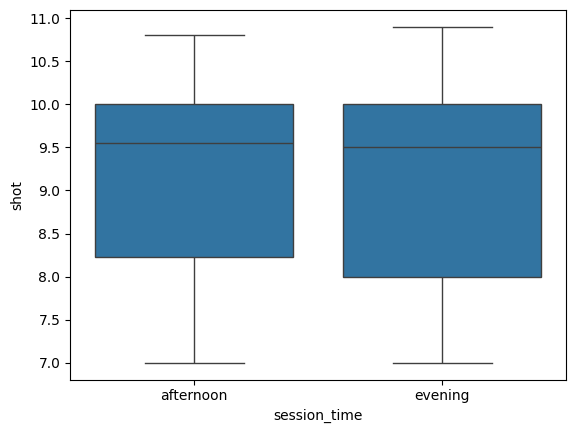

In [ ]:
sns.boxplot(x="session_time", y="shot", data=df)

<Axes: xlabel='went_to_school', ylabel='shot'>

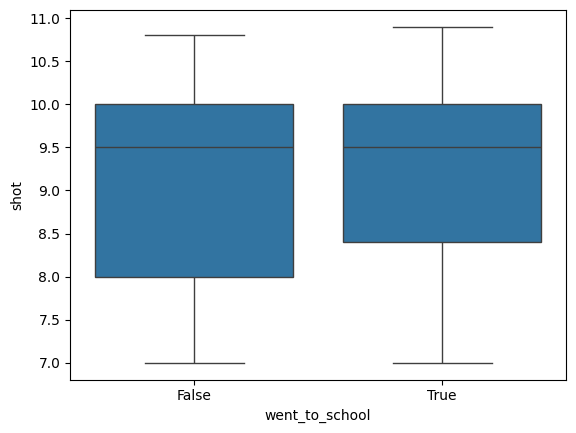

In [ ]:
sns.boxplot(x="went_to_school", y="shot", data=df)

<Axes: xlabel='using_own_gun', ylabel='shot'>

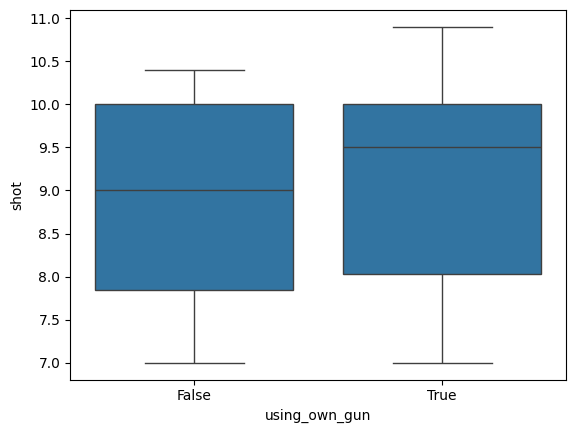

In [ ]:
sns.boxplot(x="using_own_gun", y="shot", data=df)

<Axes: xlabel='target_type', ylabel='shot'>

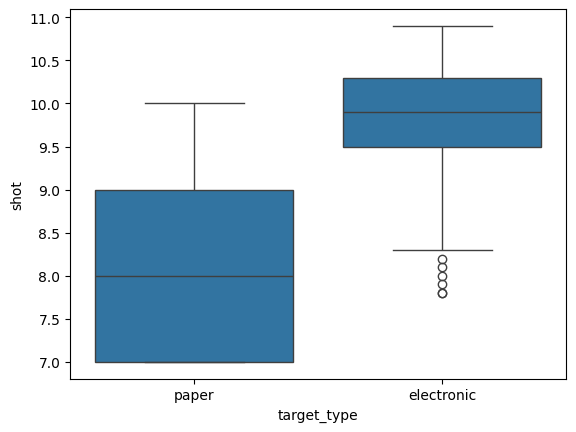

In [ ]:
sns.boxplot(x="target_type", y="shot", data=df)

In [ ]:
df_correlation = df.drop(columns=['target_type','went_to_school','session_time','using_own_gun','target_type','day_of_week','sighted_direction','sighted_times'], inplace=False)

In [ ]:
df_correlation.head()

,set,MPI_x,MPI_y,shot
0,1,0.65,0.12,9.0
1,1,0.65,0.12,9.5
2,1,0.65,0.12,9.0
3,1,0.65,0.12,9.6
4,1,0.65,0.12,9.5


In [ ]:
df_correlation.corr()

,set,MPI_x,MPI_y,shot
set,1.000000,0.073872,0.054722,0.007921
MPI_x,0.073872,1.000000,-0.176453,0.023408
MPI_y,0.054722,-0.176453,1.000000,-0.042974
shot,0.007921,0.023408,-0.042974,1.000000


# Preprocessing Data
- OneHotEncoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

In [ ]:
one_hot_encoded = encoder.fit_transform(df[['went_to_school','session_time','using_own_gun','target_type','day_of_week','sighted_direction','sighted_times']])

In [ ]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['went_to_school','session_time','using_own_gun','target_type','day_of_week','sighted_direction','sighted_times']))


In [ ]:
df_encoded = pd.concat([df, one_hot_df], axis=1)

In [ ]:
df_encoded = df_encoded.drop(['went_to_school','session_time','using_own_gun','target_type','day_of_week','sighted_direction','sighted_times'], axis=1)

In [ ]:
df_encoded

,set,MPI_x,MPI_y,shot,went_to_school_False,went_to_school_True,session_time_afternoon,session_time_evening,using_own_gun_False,using_own_gun_True,...,sighted_direction_0,sighted_direction_H,sighted_direction_L,sighted_direction_R,sighted_direction_T,sighted_times_0,sighted_times_1,sighted_times_2,sighted_times_3,sighted_times_4
0,1,0.65,0.12,9.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.65,0.12,9.5,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,0.65,0.12,9.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.65,0.12,9.6,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0.65,0.12,9.5,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,-1.12,-0.45,9.9,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
996,10,-1.12,-0.45,10.1,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
997,10,-1.12,-0.45,9.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
998,10,-1.12,-0.45,9.3,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_encoded.corr()

,set,MPI_x,MPI_y,shot,went_to_school_True,went_to_school_nan,session_time_afternoon,session_time_evening,using_own_gun_True,target_type_electronic,...,sighted_direction_0,sighted_direction_H,sighted_direction_L,sighted_direction_R,sighted_direction_T,sighted_times_0,sighted_times_1,sighted_times_2,sighted_times_3,sighted_times_4
set,1.000000e+00,-0.142364,-0.464760,-0.289511,0.173205,-0.173205,-0.547723,0.547723,NaN,-3.651484e-01,...,-8.473472e-17,-0.058387,0.116775,-3.200639e-17,-0.082107,-8.473472e-17,-0.047946,-0.123161,0.087581,0.082107
MPI_x,-1.423641e-01,1.000000,0.379714,-0.190239,-0.114457,0.114457,-0.151823,0.151823,NaN,-1.919037e-01,...,6.769813e-02,-0.030815,0.069398,-4.712878e-02,-0.160953,6.769813e-02,-0.159482,0.124174,-0.051790,0.048796
MPI_y,-4.647596e-01,0.379714,1.000000,-0.090461,0.037078,-0.037078,0.452036,-0.452036,NaN,-3.810676e-01,...,3.892247e-03,-0.021051,-0.083217,1.802496e-01,-0.116793,3.892247e-03,-0.170570,0.226648,0.081079,-0.058512
shot,-2.895114e-01,-0.190239,-0.090461,1.000000,-0.106898,0.106898,0.147509,-0.147509,NaN,5.900351e-01,...,-5.192734e-02,0.028828,0.074691,-6.289795e-02,0.075551,-5.192734e-02,0.094692,0.001843,-0.062898,0.057124
went_to_school_True,1.732051e-01,-0.114457,0.037078,-0.106898,1.000000,-1.000000,-0.316228,0.316228,NaN,-3.162278e-01,...,1.577051e-01,-0.016855,-0.168550,-1.685500e-02,-0.118511,1.577051e-01,-0.207614,-0.118511,0.134840,-0.118511
went_to_school_nan,-1.732051e-01,0.114457,-0.037078,0.106898,-1.000000,1.000000,0.316228,-0.316228,NaN,3.162278e-01,...,-1.577051e-01,0.016855,0.168550,1.685500e-02,0.118511,-1.577051e-01,0.207614,0.118511,-0.134840,0.118511
session_time_afternoon,-5.477226e-01,-0.151823,0.452036,0.147509,-0.316228,0.316228,1.000000,-1.000000,NaN,2.500000e-01,...,-1.026751e-01,0.053300,0.053300,5.330018e-02,0.037477,-1.026751e-01,0.065653,0.037477,0.053300,0.037477
session_time_evening,5.477226e-01,0.151823,-0.452036,-0.147509,0.316228,-0.316228,-1.000000,1.000000,NaN,-2.500000e-01,...,1.026751e-01,-0.053300,-0.053300,-5.330018e-02,-0.037477,1.026751e-01,-0.065653,-0.037477,-0.053300,-0.037477
using_own_gun_True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target_type_electronic,-3.651484e-01,-0.191904,-0.381068,0.590035,-0.316228,0.316228,0.250000,-0.250000,NaN,1.000000e+00,...,-1.466787e-01,0.053300,0.213201,-1.066004e-01,0.149906,-1.466787e-01,0.262613,-0.074953,-0.106600,0.149906


# Model Training
- Train Test Split
- Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded[['went_to_school_True', 'went_to_school_False', 'session_time_afternoon', 'session_time_evening', 'using_own_gun_True', 'target_type_electronic', 'target_type_paper', 'day_of_week_Friday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday']]

y=df_encoded['shot']
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=20, random_state=20)

In [ ]:
X

,went_to_school_True,went_to_school_nan,session_time_afternoon,session_time_evening,using_own_gun_True,target_type_electronic,target_type_paper,day_of_week_Friday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
85,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
86,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
87,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
88,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression

line = LinearRegression()
line.fit(X,y)
(line.intercept_,line.coef_)

(-73960622199414.73,
 array([-8.13690849e+12,  5.24595984e+13,  5.29360705e+13,  5.29360705e+13,
         1.43798828e-01,  7.90297728e+12,  7.90297728e+12,  2.12584829e+13,
        -3.93380239e+13, -3.93380239e+13,  2.12584829e+13]))

# Model Evaluation
- Prediction and Mean Square Error score

In [ ]:
 #Finding Mean Square Error
def MSE(ys, y_hats):
    n = len(ys)
    differences = ys - y_hats
    squared_diffs = differences ** 2
    summed_squared_differences = sum(squared_diffs)
    return (1/n) * summed_squared_differences

In [ ]:
MSE(line.predict(x_train),y_train)

0.7884510124362241

In [ ]:
line.score(x_train, y_train)

0.3915710122181095

# Conculsion
Does these variable really affect our shot score?
-